<a href="https://colab.research.google.com/github/rajgupta-github/DeepLearning-with-Python/blob/master/NeuralNetwork/Regression/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import tensorflow as tf
import datetime
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext tensorboard

from google.colab import drive
drive.mount('/content/drive')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
house = pd.read_csv('/content/drive/My Drive/TensorFlow/kc_house_data.csv')
house.describe()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

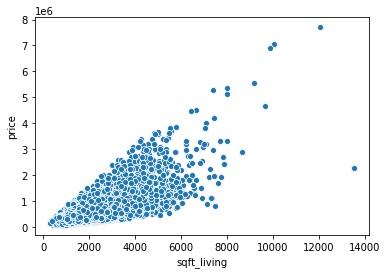

In [96]:
sns.scatterplot(house['sqft_living'], house['price'])

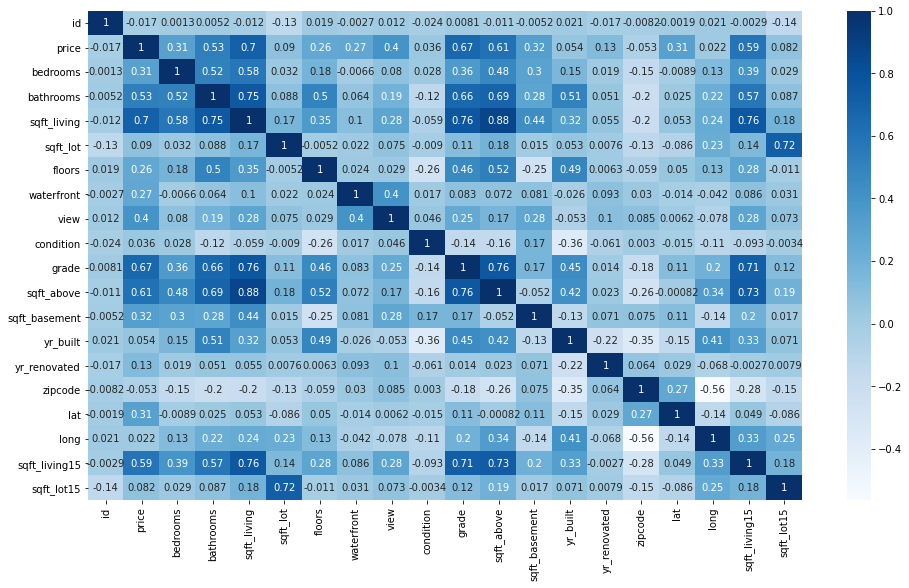

In [97]:
plt.figure(figsize=(16,9))
sns.heatmap(house.corr(),cmap='Blues',annot=True) 

In [98]:
def get_high_corr_features(df, threshold):
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colnamei = corr_matrix.columns[i]
                colnamej = corr_matrix.columns[j]
                corr_features.add( (colnamei,colnamej) )
                # corr_features.append(colnamej)
    return corr_features   
get_high_corr_features(house, 0.7)       

{('grade', 'sqft_living'),
 ('sqft_above', 'grade'),
 ('sqft_above', 'sqft_living'),
 ('sqft_living', 'bathrooms'),
 ('sqft_living', 'price'),
 ('sqft_living15', 'grade'),
 ('sqft_living15', 'sqft_above'),
 ('sqft_living15', 'sqft_living'),
 ('sqft_lot15', 'sqft_lot')}

In [0]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', ]

In [100]:
X = house[selected_features]
y = house['price']
print(X.shape)
print(y.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

print(X_train.shape)
print(X_test.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.summary()
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

(21613, 7)
(21613,)
(16209, 7)
(5404, 7)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0012 - val_loss: 9.2243e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 9.3545e-

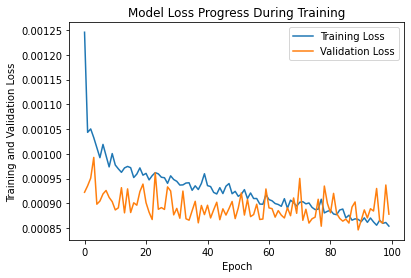

In [101]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

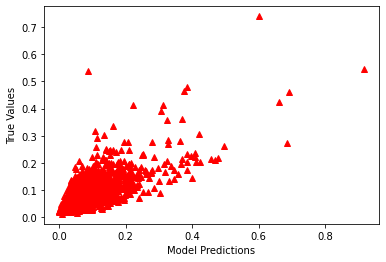

In [102]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


(0.0, 3000000.0)

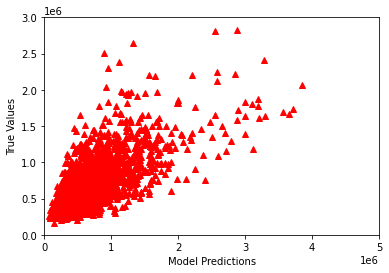

In [103]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [104]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 248845.097 
MSE = 61923882522.649864 
MAE = 157035.29055155904 
R2 = 0.5806511823592593 
Adjusted R2 = 0.5801071790746994


LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES) AND RETRAIN THE EXACT SAME MODEL

In [0]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [106]:
X = house[selected_features]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y = house['price']
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 8.4898e-04 - val_loss: 5.6822e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 5.0937e-04 - val_loss: 5.6563e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 4.8986e-04 - val_loss: 4.7949e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 4.1291e-04 - val_loss: 4.7238e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 4.1324e-04 - val_loss: 4.4671e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 4.0051e-04 - val_loss: 5.0639e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 3.5871e-04 - val_loss: 4.2386e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 3.3146e-04 - val_loss: 4.1415e-04
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 3.3122e-04 - val_loss: 5.1475e-04
Epoch 10/100
260/26

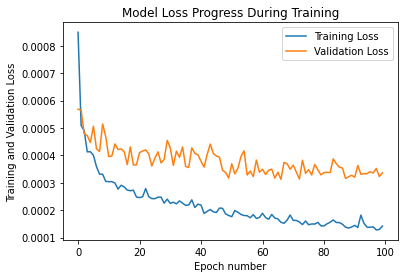

In [107]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

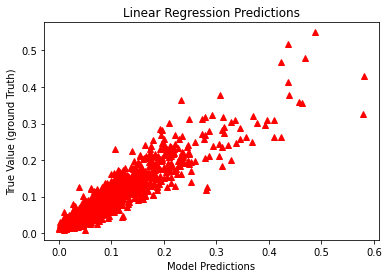

In [108]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [0]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [110]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 123868.26 
MSE = 15343345844.75385 
MAE = 72240.92582462064 
R2 = 0.8855929838049363 
Adjusted R2 = 0.8854445684762919
